# AC SEDDIKI TESNYME BENLARBI NESRINE IV M2

In [29]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt
import math


conversion l'image en niveau de gris 

In [30]:
def redimensioner(image1):
    dim=(128,128)
    image1=cv2.resize(image1,dim)
    return image1


In [31]:
def preprocessing(image):

    image3=redimensioner(image)
  
    return image3

In [32]:
def face(image,k):
    face_cascade = cv2.CascadeClassifier("opencv-4.x\opencv-4.x/data/haarcascades/haarcascade_frontalface_default.xml")
    face1 = face_cascade.detectMultiScale(image)
    for i,[x,y,w,h] in enumerate (face1):
        face_image = image[y:y + h, x:x + w]
        file_name = "image"+str(k)+".jpg ".format(i)
        file_path = file_name
    return face_image,file_path 

In [33]:
# read and detect face of all images
def read_face(nb_img):
    for i in range(nb_img):
        
        image=cv2.imread('img'+str(i+1)+'.jpg',0)
       
        
        face_image,file_path =face(image,i+1)
        face_image=preprocessing(face_image)
        plt.imshow(face_image,cmap='gray')
        cv2.imwrite(file_path, face_image)


redimensionner l'image 


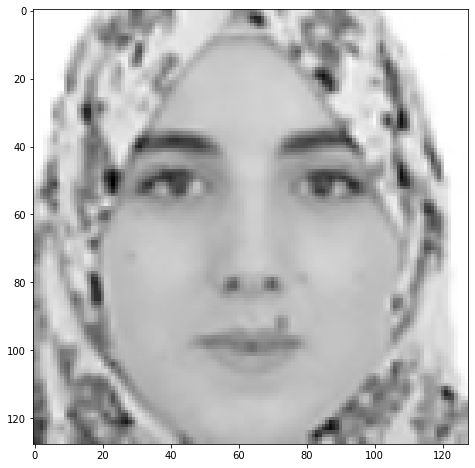

In [34]:

read_face(7)

diviser l'image en 8*8

In [35]:
def diviser_8x8(image):
    height,width=np.shape(image)
    height=int(height/8)
    width=int(width/8)

    tab_8x8=image.reshape((height,width,8,8))
    return tab_8x8

dupliquer premiere / derniere (ligne/colonnes)
creer un tableau de taille liste danslequel on stoque les descripteur de chque matrice 8*8

In [36]:
def direction (matrice) :
    image_grad_x=cv2.Sobel(matrice,cv2.CV_32F,1,0,ksize=1)
    image_grad_y=cv2.Sobel(matrice,cv2.CV_32F,0,1,ksize=1)
    height,width =np.shape(matrice)
    image_direction =np.zeros((height,width))
    for i in range(height):
        for j in range(width):
            x=(math.atan2(image_grad_y[i][j],image_grad_x[i][j]) *180) /math.pi
            if x <0 :
                x=x+360
            image_direction[i][j]=x    
    return image_direction 


In [37]:
def direction_image(liste_matrice_8x8) :
    height, width , height_matrix, width_matrix=np.shape(liste_matrice_8x8)
    imagedirection=np.zeros((height,width,height_matrix,width_matrix))
    hist=np.zeros((height*width,8))
    cpt=0
    for i in range( height):
        for j in range(width):   
           #calculer la dircetion 
           matrice = direction(liste_matrice_8x8 [i][j]) 
           imagedirection[i][j]=matrice
           hist[cpt]=histHOG(matrice)
           
           cpt=cpt+1
           


    return imagedirection ,hist      


In [38]:
def normalize(hist_4x8):
    height,width = np.shape(hist_4x8)
    sum=0
    for i in range(height):
        for j in range(width):
            sum+=hist_4x8[i][j]**2

    sum=math.sqrt(sum)
    for i in range(height):
        for j in range(width):
            hist_4x8[i][j]=hist_4x8[i][j]/sum        


In [39]:
def normalize_histogram(hist):
    height,width=np.shape(hist)
    i=0

    while i <height:
        normalize(hist[i:i+3])
        i=i+4
        
        






In [40]:
def MSE(hist_img1,hist_img2):
    height,width =np.shape(hist_img1)
    n=height*width
    mse=0

    for i in range(height):
        for j in range(width):
            
            diff=float(hist_img1[i][j]-hist_img2[i][j])
            diff=diff**2
            mse=mse+diff
    mse=mse/n        
   
    return mse
    

In [41]:
def histHOG (desc):
    height,width=np.shape(desc)
  
    hist = np.ones (8)
    i=1
    while i<=8 :
        cpt =0
        for j in range (height):
            for k in range(width):
                if i ==1 :

                   if  desc[j][k]<=i*45 and desc[j][k]>=(i-1)*45 :
                       cpt=cpt+1
                else :
                    if  desc[j][k]<=i*45 and desc[j][k]>(i-1)*45 :
                       cpt=cpt+1
        hist[i-1]=cpt               
        i=i+1               

    return hist                       


In [42]:
def main_function(nb):
    liste_hist= []
    for i in range( nb):
        image=cv2.imread('image'+str(i+1)+'.jpg',0)
        tab_8x8=diviser_8x8(image)
        desc,hist=direction_image(tab_8x8)
        liste_hist.append(hist)
       
        np.savetxt("histogramHog"+str(i+1)+".csv", hist, delimiter=",")

    liste=[]    
    i=1
    while (i<=nb):
        j=1
        
        min=10000
        min_img=-1
        hist1= np.genfromtxt('histogramHog'+str(i)+'.csv', delimiter=',')
        while (j<=nb):
            if i!=j:

            
                hist2=np.genfromtxt('histogramHog'+str(j)+'.csv',delimiter=',')
                mse=MSE (hist1,hist2)
                if mse <min :
                   min_img=j
                   min=mse
            j+=1    
        liste.append([i,min_img,min])    
        i+=1  
        #sauvegarder l'image qui ressemble le plus a l'image i  et le mse  
    return liste,liste_hist     

[[1, 2, 12.8076171875], [2, 1, 12.8076171875], [3, 4, 24.984375], [4, 5, 16.51953125], [5, 4, 16.51953125], [6, 5, 20.76171875], [7, 1, 23.025390625]]


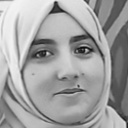

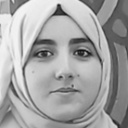

-----------------------------------------------------


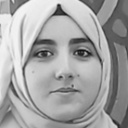

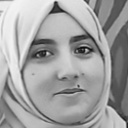

-----------------------------------------------------


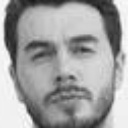

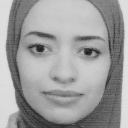

-----------------------------------------------------


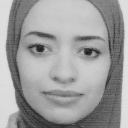

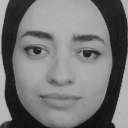

-----------------------------------------------------


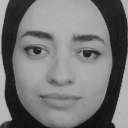

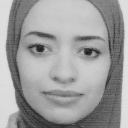

-----------------------------------------------------


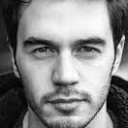

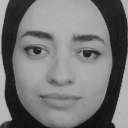

-----------------------------------------------------


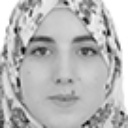

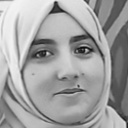

-----------------------------------------------------


In [43]:
liste,liste_hist=main_function(7)
print(liste)
from IPython.display import Image, display

for img in liste:
    display(Image(filename = 'image'+str(img[0])+'.jpg')) 
    display(Image(filename = 'image'+str(img[1])+'.jpg'))
    
    print("-----------------------------------------------------")

histogramme de l'image  1


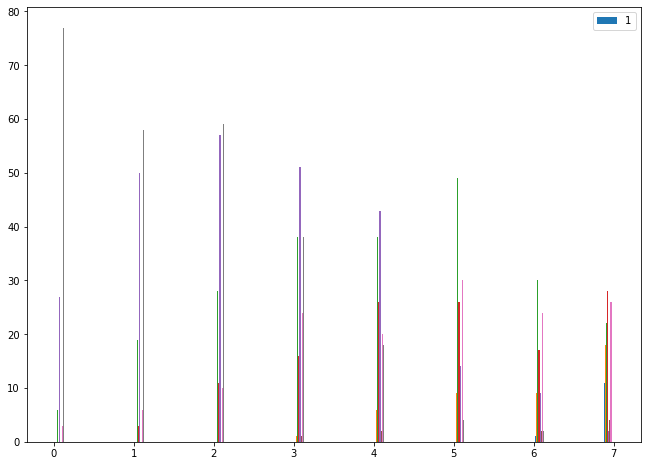

histogramme de l'image  2


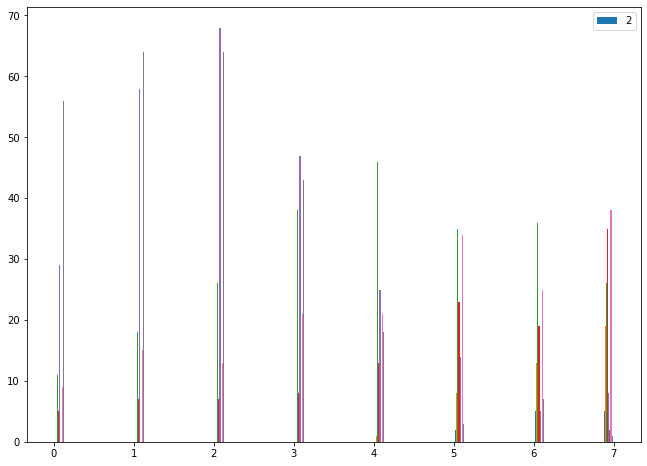

histogramme de l'image  3


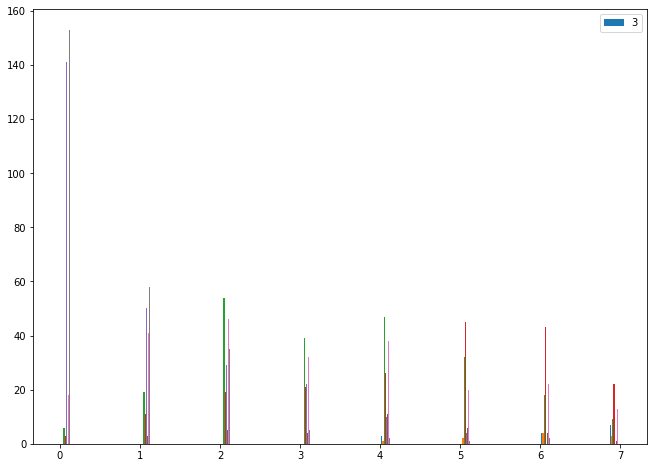

histogramme de l'image  4


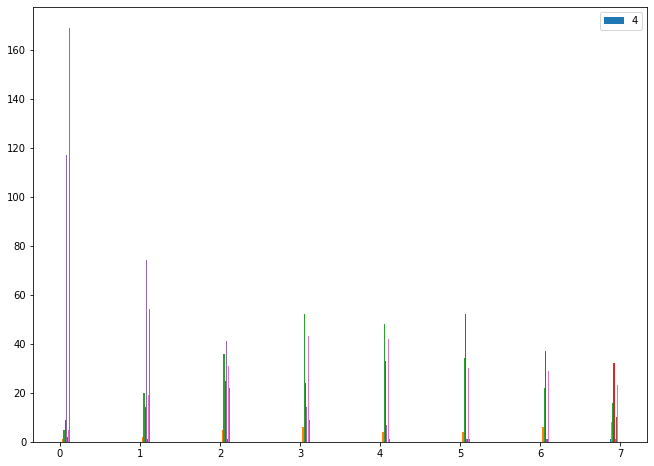

histogramme de l'image  5


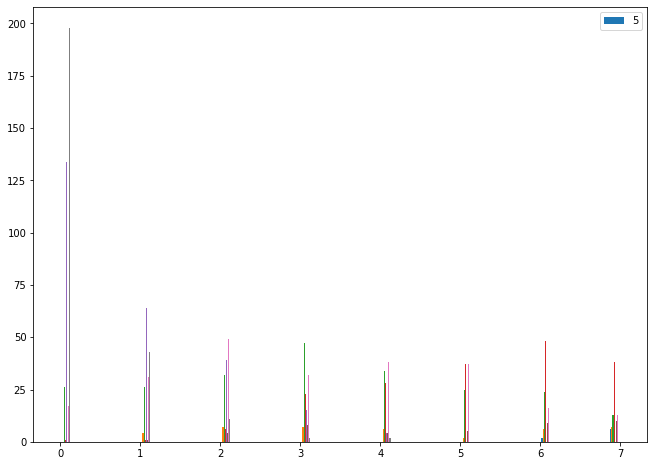

histogramme de l'image  6


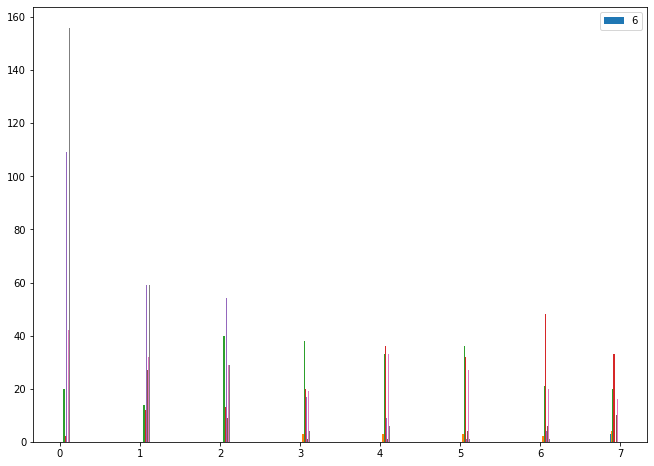

histogramme de l'image  7


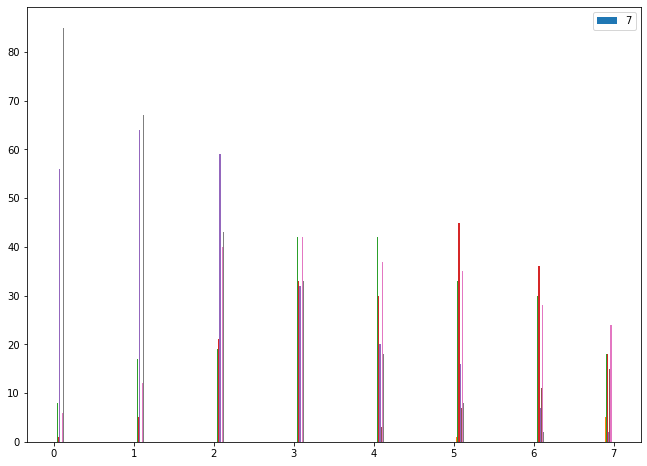

In [44]:
def affichage_hists(liste_hist):
    bins = np.linspace(0, 7)
    l=len(liste_hist)
    
    for i in range(l):

        plt.hist(liste_hist[i],bins,  label=str(i+1)) 
        
        plt.legend(loc='upper right') 
        print("histogramme de l'image ",i+1)
        plt.show()



affichage_hists(liste_hist)
